# In Class Notebook, Week 07

You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import bqplot
import numpy as np

## Intro to Maps with bqplot
(and its limitations)

In [3]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

#2. scales
sc_geo = bqplot.Mercator() # not a great projection!!

# 3 marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together!
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

#2. scales
sc_geo = bqplot.Gnomonic() # nightmare projection!

# 3 marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together!
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [8]:
# 1. data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection
#sc_geo = bqplot.Gnomonic() # world projection

# 3. marks
state_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

fig = bqplot.Figure(marks=[state_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [10]:
# 1. data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# tooltip
tt = bqplot.Tooltip(fields=['id','name'])

# 3. marks
state_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo},tooltip=tt)

# 4. interactions
state_map.interactions = {'click':'select','hover':'tooltip'}

fig = bqplot.Figure(marks=[state_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [11]:
!ls /Users/jnaiman/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [12]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

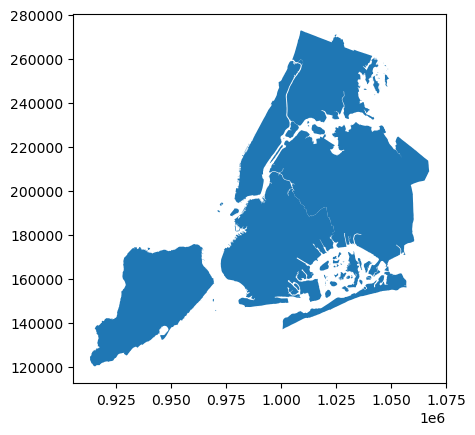

In [13]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df.plot()

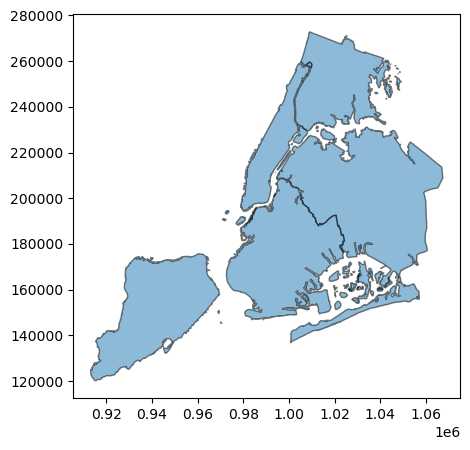

In [14]:
ax = df.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

In [15]:
councils = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/1/query?outFields=*&where=1%3D1&f=geojson')

In [16]:
councils.head()

,OBJECTID_1,District,Council_me,Shape.STArea(),Shape.STLength(),geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [17]:
councils.describe()

,OBJECTID_1,Shape.STArea(),Shape.STLength()
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.298582e+08,115689.972103
std,1.581139,6.161040e+07,61814.979912
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.838498e+08,144362.359386
max,815.000000,2.009197e+08,211060.175261


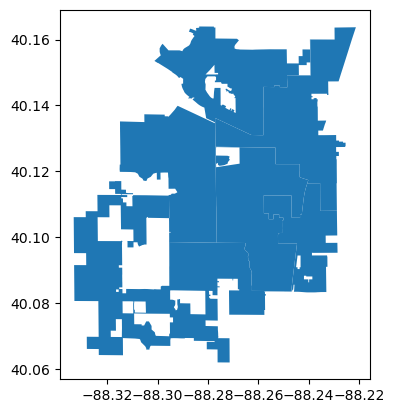

In [18]:
councils.plot()

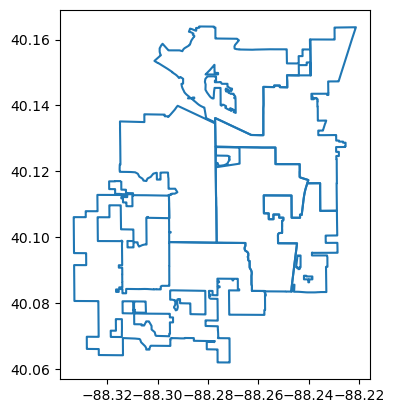

In [19]:
councils.boundary.plot()

In [20]:
councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [21]:
councils.centroid

/Users/jnaiman/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [22]:
councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
props = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/2/query?outFields=*&where=1%3D1&f=geojson')

In [24]:
props.head()

,OBJECTID,COMMENTS,CB,DEPT,PIN,ACREAGE,CODE_TYPE,DESCRIPTION,TYPE,DEPT_ABBR,DESCRIP_ADDR,FUTURE,PA,ZONING,Shape.STArea(),Shape.STLength(),geometry
0,1,,,PWD,412001326010,0.755*,A,Drainage/Boneyard,Boneyard Channel,PWD,Boneyard Channel,Flood Hazard Area,101.0,MHP,32930.497936,897.925620,"POLYGON ((-88.25043 40.13085, -88.25044 40.130..."
1,2,,None,NSD,422012226003,4.432*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,1930.800333,272.145439,"POLYGON ((-88.24300 40.12699, -88.24300 40.127..."
2,3,,None,NSD,422012226004,0.181*,D,City Redevelopment,Beardsley Park Plan,NSD,1110 N Neil,Neighborhood Plan,1.0,SF 1,7915.196446,372.150616,"POLYGON ((-88.24300 40.12681, -88.24300 40.126..."
3,4,,None,NSD,422012226005,0.186*,D,City Redevelopment,Beardsley Park Plan,NSD,1108 N Neil,Neighborhood Plan,1.0,SF 1,8104.292805,377.890980,"POLYGON ((-88.24344 40.12663, -88.24300 40.126..."
4,5,,None,NSD,422012226006,0.185*,D,City Redevelopment,Beardsley Park Plan,NSD,1106 N Neil,Neighborhood Plan,1.0,SF 1,8088.671149,377.710096,"POLYGON ((-88.24344 40.12645, -88.24299 40.126..."


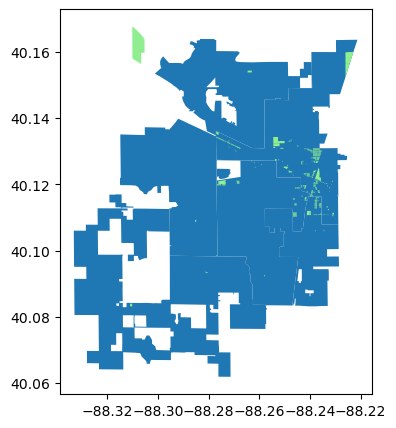

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
councils.plot(ax=ax)
props.plot(ax=ax, color='lightgreen')
plt.show()

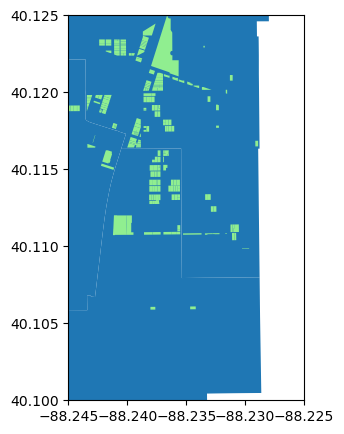

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
councils.plot(ax=ax)
props.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10,40.125)
plt.show()

## Other public datasets